In [25]:
import numpy as np
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
def setParameters(X, Y, hidden_size):
    np.random.seed(3)
    input_size = X.shape[0] # number of neurons in input layer
    output_size = Y.shape[0] # number of neurons in output layer.
    W1 = np.random.randn(hidden_size, input_size)*np.sqrt(1/input_size)
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size)*np.sqrt(1/hidden_size)
    b2 = np.zeros((output_size, 1))
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}


In [26]:
def forwardPropagation(X, params):
    Z1 = np.dot(params['W1'], X)+params['b1']
    A1 = np.tanh(Z1)
    Z2 = np.dot(params['W2'], A1)+params['b2']
    y = sigmoid(Z2)  
    return y, {'Z1': Z1, 'Z2': Z2, 'A1': A1, 'y': y}
def cost(predict, actual):
    m = actual.shape[1]
    cost__ = -np.sum(np.multiply(np.log(predict), actual) + np.multiply((1 - actual), np.log(1 - predict)))/m
    return np.squeeze(cost__)
def backPropagation(X, Y, params, cache):
    m = X.shape[1]
    dy = cache['y'] - Y
    dW2 = (1 / m) * np.dot(dy, np.transpose(cache['A1']))
    db2 = (1 / m) * np.sum(dy, axis=1, keepdims=True)
    dZ1 = np.dot(np.transpose(params['W2']), dy) * (1-np.power(cache['A1'], 2))
    dW1 = (1 / m) * np.dot(dZ1, np.transpose(X))
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
def updateParameters(gradients, params, learning_rate = 1.2):
    W1 = params['W1'] - learning_rate * gradients['dW1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    W2 = params['W2'] - learning_rate * gradients['dW2']
    b2 = params['b2'] - learning_rate * gradients['db2']
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
def fit(X, Y, learning_rate, hidden_size, number_of_iterations = 5000):
    params = setParameters(X, Y, hidden_size)
    cost_ = []
    for j in range(number_of_iterations):
        y, cache = forwardPropagation(X, params)
        costit = cost(y, Y)
        gradients = backPropagation(X, Y, params, cache)
        params = updateParameters(gradients, params, learning_rate)
        cost_.append(costit)
    return params, cost_

In [27]:

import os
import cv2
import numpy as np

def load_images_from_directory(directory):
    images = []
    labels = []
    class_folders = sorted(os.listdir(directory))
    for class_label, class_folder in enumerate(class_folders):
        class_path = os.path.join(directory, class_folder)
        for filename in os.listdir(class_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Adjust the file extensions as needed
                image_path = os.path.join(class_path, filename)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (32, 32))  # Resize images to 32x32 pixels
                images.append(image)
                labels.append(class_label)

    return np.array(images), np.array(labels)

# Define paths to your training and testing directories
train_directory = './train'
test_directory = './test'
# Load and preprocess the training dataset
train_x_orig, train_y = load_images_from_directory(train_directory)
# Load and preprocess the testing dataset
test_x_orig, test_y = load_images_from_directory(test_directory)

# Reshape and normalize the image data
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255.
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255.
train_y = train_y.reshape(1, -1)
test_y = test_y.reshape(1, -1)

In [49]:
# def predict(test_x, test_y, parameters,threshold):

#     """
#     Predict test data
#     test_x -- test data
#     test_y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    
#     Returns:
#     accuracy -- accuracy of your model
    
#     """
#     predictions = np.zeros((1,test_x.shape[1]))
#     pred=forwardPropagation(test_x, parameters)
    
#     for i in range(0, pred.shape[1]):
#         predictions[0,i] = (pred[0,i] > threshold)
    
#     accuracy = np.sum((predictions == test_y)/test_x.shape[1])
#     return predictions, accuracy
def predict(X, params):
    """
    Make predictions using a trained neural network.

    Arguments:
    X -- input data
    params -- parameters of the trained neural network

    Returns:
    predictions -- predicted labels
    """
    _, cache = forwardPropagation(X, params)
    print(cache['y'])
    predictions = (cache['y'] > 0.91611097).astype(int)*5
    
    return predictions

[[0.91721579 0.91919575 0.91611097 ... 0.91958002 0.91904267 0.91924485]]
Test Accuracy: [[5 5 0 ... 5 5 5]]

Accuracy on Test Set: 6.13%


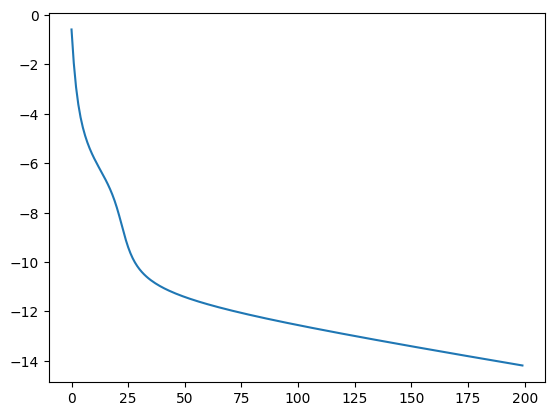

In [50]:
import sklearn.datasets
X, Y = train_x,train_y
# X, Y = X.T, Y.reshape(1, Y.shape[0])
# print(X.shape)
# print(Y.shape)
params, cost_ = fit(X, Y, 0.00008, 5, 200)
test_predictions = predict(test_x, params)
print("Test Accuracy: " + str(test_predictions))
# Evaluate accuracy
test_accuracy = np.mean((test_predictions == test_y).astype(int)) * 100
print(f"\nAccuracy on Test Set: {test_accuracy:.2f}%")
import matplotlib.pyplot as plt
plt.plot(cost_)

In [51]:
"""import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def setParametersTwoLayers(X, Y, hidden_size1, hidden_size2):
    np.random.seed(3)
    input_size = X.shape[0]
    output_size = Y.shape[0]
    
    W1 = np.random.randn(hidden_size1, input_size) * np.sqrt(1 / input_size)
    b1 = np.zeros((hidden_size1, 1))
    
    W2 = np.random.randn(hidden_size2, hidden_size1) * np.sqrt(1 / hidden_size1)
    b2 = np.zeros((hidden_size2, 1))
    
    W3 = np.random.randn(output_size, hidden_size2) * np.sqrt(1 / hidden_size2)
    b3 = np.zeros((output_size, 1))
    
    return {'W1': W1, 'W2': W2, 'W3': W3, 'b1': b1, 'b2': b2, 'b3': b3}

# Function for forward propagation in a two-layer neural network
def forwardPropagationTwoLayers(X, params):
    Z1 = np.dot(params['W1'], X) + params['b1']
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(params['W2'], A1) + params['b2']
    A2 = np.tanh(Z2)
    
    Z3 = np.dot(params['W3'], A2) + params['b3']
    y = sigmoid(Z3)
    
    return y, {'Z1': Z1, 'Z2': Z2, 'Z3': Z3, 'A1': A1, 'A2': A2, 'y': y}

# Function for backpropagation in a two-layer neural network
def backPropagationTwoLayers(X, Y, params, cache):
    m = X.shape[1]
    dy = cache['y'] - Y
    
    dW3 = (1 / m) * np.dot(dy, np.transpose(cache['A2']))
    db3 = (1 / m) * np.sum(dy, axis=1, keepdims=True)
    
    dZ2 = np.dot(np.transpose(params['W3']), dy) * (1 - np.power(cache['A2'], 2))
    dW2 = (1 / m) * np.dot(dZ2, np.transpose(cache['A1']))
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(np.transpose(params['W2']), dZ2) * (1 - np.power(cache['A1'], 2))
    dW1 = (1 / m) * np.dot(dZ1, np.transpose(X))
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}

# Function to update parameters in a two-layer neural network
def updateParametersTwoLayers(gradients, params, learning_rate=1.2):
    W1 = params['W1'] - learning_rate * gradients['dW1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    
    W2 = params['W2'] - learning_rate * gradients['dW2']
    b2 = params['b2'] - learning_rate * gradients['db2']
    
    W3 = params['W3'] - learning_rate * gradients['dW3']
    b3 = params['b3'] - learning_rate * gradients['db3']
    
    return {'W1': W1, 'W2': W2, 'W3': W3, 'b1': b1, 'b2': b2, 'b3': b3}

# Function to fit a two-layer neural network
def fitTwoLayers(X, Y, learning_rate, hidden_size1, hidden_size2, number_of_iterations=5000):
    params = setParametersTwoLayers(X, Y, hidden_size1, hidden_size2)
    cost_ = []
    
    for j in range(number_of_iterations):
        y, cache = forwardPropagationTwoLayers(X, params)
        costit = cost(y, Y)
        gradients = backPropagationTwoLayers(X, Y, params, cache)
        params = updateParametersTwoLayers(gradients, params, learning_rate)
        cost_.append(costit)
    
    return params, cost_

# Define different hyperparameter settings for your experiments
hidden_sizes1 = [5, 10, 15]
hidden_sizes2 = [5, 10, 15]
activation_functions = ['tanh', 'sigmoid']
learning_rates = [0.001, 0.01, 0.1]
num_iterations = 1000

# Create a table to store results
results_table_two_layers = []

# Load and preprocess the Flower Species Image Dataset
train_directory = './train'
test_directory = './test'
val_dir = './val'
train_x_orig, train_y = load_images_from_directory(train_directory)
test_x_orig, test_y = load_images_from_directory(test_directory)
X_val, Y_val = load_images_from_directory(val_dir)

# Reshape and normalize the image data
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255.
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255.
# Reshape and normalize the image data
X_val = X_val.reshape(X_val.shape[0], -1).T / 255.
train_x = train_y.reshape(1, -1)
test_y = test_y.reshape(1, -1)
Y_val=Y_val.reshape(1, -1)


# Run experiments and populate the results table for two-layer neural network
for hidden_size1 in hidden_sizes1:
    for hidden_size2 in hidden_sizes2:
        for activation_func in activation_functions:
            for learning_rate in learning_rates:
                key = f"{hidden_size1}_{hidden_size2}_{activation_func}_{learning_rate}"
                
                  # Train the two-layer neural network and make predictions on the validation set
                params_two_layers, cost_two_layers = fitTwoLayers(train_x, train_x, learning_rate, hidden_size1, hidden_size2, num_iterations)
                val_predictions_two_layers = predict(X_val, params_two_layers)
                
                # Evaluate accuracy on the validation set for two-layer neural network
                val_accuracy_two_layers = accuracy_score(Y_val.flatten(), val_predictions_two_layers.flatten()) * 100
                
                results_table_two_layers.append({'Setting': key, 'Accuracy': val_accuracy_two_layers})
                
                # Print the current result for two-layer neural network
                print("{:<40} {:<10.2f}".format(key, val_accuracy_two_layers))
"""

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\ndef setParametersTwoLayers(X, Y, hidden_size1, hidden_size2):\n    np.random.seed(3)\n    input_size = X.shape[0]\n    output_size = Y.shape[0]\n    \n    W1 = np.random.randn(hidden_size1, input_size) * np.sqrt(1 / input_size)\n    b1 = np.zeros((hidden_size1, 1))\n    \n    W2 = np.random.randn(hidden_size2, hidden_size1) * np.sqrt(1 / hidden_size1)\n    b2 = np.zeros((hidden_size2, 1))\n    \n    W3 = np.random.randn(output_size, hidden_size2) * np.sqrt(1 / hidden_size2)\n    b3 = np.zeros((output_size, 1))\n    \n    return {\'W1\': W1, \'W2\': W2, \'W3\': W3, \'b1\': b1, \'b2\': b2, \'b3\': b3}\n\n# Function for forward propagation in a two-layer neural network\ndef forwardPropagationTwoLayers(X, params):\n    Z1 = np.dot(params[\'W1\'], X) + params[\'b1\']\n    A1 = np.tanh(Z1)\n    \n    Z2 = np.dot(params[\'W2\'], A1) + params

In [52]:
"""import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def load_images_from_directory(directory):
    images = []
    labels = []
    class_folders = sorted(os.listdir(directory))
    for class_label, class_folder in enumerate(class_folders):
        class_path = os.path.join(directory, class_folder)
        for filename in os.listdir(class_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Adjust the file extensions as needed
                image_path = os.path.join(class_path, filename)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (32, 32))  # Resize images to 32x32 pixels
                images.append(image)
                labels.append(class_label)

    return np.array(images), np.array(labels)

# Define paths to your training and testing directories
train_directory = './train'
test_directory = './test'

# Load and preprocess the training dataset
train_x_orig, train_y = load_images_from_directory(train_directory)

# Load and preprocess the testing dataset
test_x_orig, test_y = load_images_from_directory(test_directory)

# Ensure train_y has the right shape (reshape if necessary)
train_y = train_y.reshape(-1, 1)

# Split the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(train_x_orig, train_y, test_size=0.2, random_state=42)

# Reshape and normalize the image data
X_train = X_train.reshape(X_train.shape[0], -1).T / 255.
X_val = X_val.reshape(X_val.shape[0], -1).T / 255.
Y_train = Y_train.reshape(1, -1)
Y_val = Y_val.reshape(1, -1)


print(f"Number of training examples: {X_train.shape[1]}")
hidden_sizes = [5, 10, 15]
activation_functions = ['tanh', 'sigmoid']
learning_rates = [0.000001, 0.000001, 0.00001]
num_iterations = 1000
# Create a table to store results
results_table = []

# Run experiments and populate the results table
for hidden_size in hidden_sizes:
    for activation_func in activation_functions:
        for learning_rate in learning_rates:
            key = f"{hidden_size}_{activation_func}_{learning_rate}"
            # Train the neural network and make predictions on the validation set
            params, cost_ = fit(X_train, Y_train, learning_rate, hidden_size, num_iterations)
            val_predictions = predict(X_val, params)
            # Evaluate accuracy on the validation set
            val_accuracy = accuracy_score(Y_val.flatten(), val_predictions.flatten()) * 100
            results_table.append({'Setting': key, 'Accuracy': val_accuracy})
            print("{:<20} {:<10.2f}".format(key, val_accuracy))
            

# Print the results in a tabular format
print("{:<20} {:<10}".format('Setting', 'Accuracy'))
print("-----------------------------------")
for result in results_table:
    print("{:<20} {:<10.2f}".format(result['Setting'], result['Accuracy']))"""

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\ndef load_images_from_directory(directory):\n    images = []\n    labels = []\n    class_folders = sorted(os.listdir(directory))\n    for class_label, class_folder in enumerate(class_folders):\n        class_path = os.path.join(directory, class_folder)\n        for filename in os.listdir(class_path):\n            if filename.endswith((\'.jpg\', \'.jpeg\', \'.png\')):  # Adjust the file extensions as needed\n                image_path = os.path.join(class_path, filename)\n                image = cv2.imread(image_path)\n                image = cv2.resize(image, (32, 32))  # Resize images to 32x32 pixels\n                images.append(image)\n                labels.append(class_label)\n\n    return np.array(images), np.array(labels)\n\n# Define paths to your training and testing directories\ntrain_directory = \'./train\'\ntest_directory =